In [1]:
#importing pkgs
import numpy as np
import pandas as pd
import keras
import tensorflow as tf


In [2]:
#checking alvb devs - tells either to work with CPU or GPU ; shows GPU too as we have connected to GPU too
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10527164444668552730
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15504290997255084597
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


**Data Splitting**

In [3]:
#loading dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


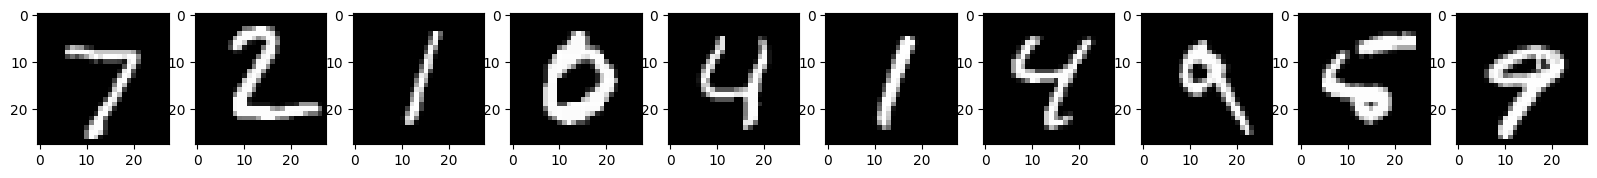

In [4]:
import matplotlib.pyplot as plt
n=10
plt.figure(figsize=(20, 4))
for i in range(n):
    plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
plt.show()

#this dataset has no RGB colors, only gray-scale colors - one channel ; imp to note this as imp in future layer definitions

In [5]:
#dataset shapes
print("x_train.shape : ", x_train.shape) #60000-num of imgs, size-28x28
print("x_test.shape : ", x_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

x_train.shape :  (60000, 28, 28)
x_test.shape :  (10000, 28, 28)
y_train.shape :  (60000,)
y_test.shape :  (10000,)


In [6]:
#reshaping dataset as now we are using CNN and no need to break img into pixels, will give whole img
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
#reshaping 'x' only has it has img features

In [7]:
#min max scaling - converting float point and normalize px values to range {0-white,1-black}
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 #scaling , normalize
x_test /= 255

In [8]:
#reshaping labels in one hot encoding for multiclass classification, modifying target variable
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

#shapes
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)
print("x_train.shape : ", x_train.shape)
print("x_test.shape : ", x_test.shape)

y_train.shape :  (60000, 10)
y_test.shape :  (10000, 10)
x_train.shape :  (60000, 28, 28, 1)
x_test.shape :  (10000, 28, 28, 1)


**Building CNN model**

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [11]:
#defining the dims of input img, 1 for grayscale (3 for RGB scale)
img_rows, img_cols , channels = 28, 28, 1

#defining num of filters for each convo layer , 4 filters here ; 6 filters on input layer and so on for each layer, increasing convo neurons on each layer basically.
filters = [6, 32, 80, 120]

#define num of classes for classification
classes = 10

In [12]:
#Creating model

model = Sequential() # seq , containair to store layers
#add convo layer in seq model with filter on 0-index, size-filter=3x3(moving filter from gif), padding is teq used to control the spatial dimensions of the output feature maps ,
model.add(Conv2D(filters[0], (3,3) ,padding='same', activation='relu', input_shape=(img_rows, img_cols, channels)))
#(for reducing img size)
model.add(MaxPooling2D(pool_size=(2,2)))

#(dim+pad-kernel)/2 ; (28+3-3)/2=14 ; formula to calculate the output dimension of a convolutional layer in a neural network, specifically when using same padding.
model.add(Conv2D(filters[1], (2,2) ,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#(dim+pad-kernel)/2 ; (14+2-2)/2=7
model.add(Conv2D(filters[2], (2,2) ,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#(dim+pad-kernel)/2 ; (7+2-2)/2=3
model.add(Conv2D(filters[3], (2,2) ,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#(dim+pad-kernel)/2 ; (3+2-2)/2=1
model.add(Flatten()) #flatten after convo layers , b4 FCN
model.add(Dense(64, activation='relu')) #dense layer , 64 neurons , random guess, hyperparameter
model.add(Dense(classes, activation='softmax')) #classes are num of nuerons
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 80)            │          10,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 80)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 120)           │          38,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 120)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           7,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,094 (226.93 KB)

 Trainable params: 58,094 (226.93 KB)

 Non-trainable params: 0 (0.00 B)

**Parameters cal in layers**

(filter_height * filter_width * input_channels + 1(bias) )* num_of_filters = parameters


Layer:1- (3 X 3 1 + 1)x 6 = 60

L2; (2x2x6(num of filters of last layer)+1)x32=800

In [14]:
#model training, best practice is to keep batch size in powers of 2, in case of imgs
model.fit(x_train, y_train,validation_split=0.2, epochs=15 , batch_size= 64 ,verbose = 1)

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2061 - loss: 2.2897 - val_accuracy: 0.5315 - val_loss: 2.1759
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6265 - loss: 1.6501 - val_accuracy: 0.8833 - val_loss: 0.3585
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9081 - loss: 0.3035 - val_accuracy: 0.9428 - val_loss: 0.1921
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9464 - loss: 0.1731 - val_accuracy: 0.9573 - val_loss: 0.1356
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9582 - loss: 0.1355 - val_accuracy: 0.9677 - val_loss: 0.1051
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9646 - loss: 0.1115 - val_accuracy: 0.9702 - val_loss: 0.0962
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9709 - loss: 0.0957 - val_accuracy: 0.9729 - val_loss: 0.0881
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9733 - loss: 0.0866 - val_accuracy: 0.

In [15]:
#testing the model
from sklearn.metrics import accuracy_score

y_pred_probs = model.predict(x_test,verbose=0)
y_pred=np.where(y_pred_probs> 0.5,1,0)

test_acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', test_acc)

Test accuracy: 0.9834


In [18]:
mask=range(20,50)

x_valid = x_test[20:40]
actual_labels = y_test[20:40]

y_pred_probs_valid = model.predict(x_valid,verbose=0)
y_pred_valid=np.where(y_pred_probs_valid> 0.5,1,0)

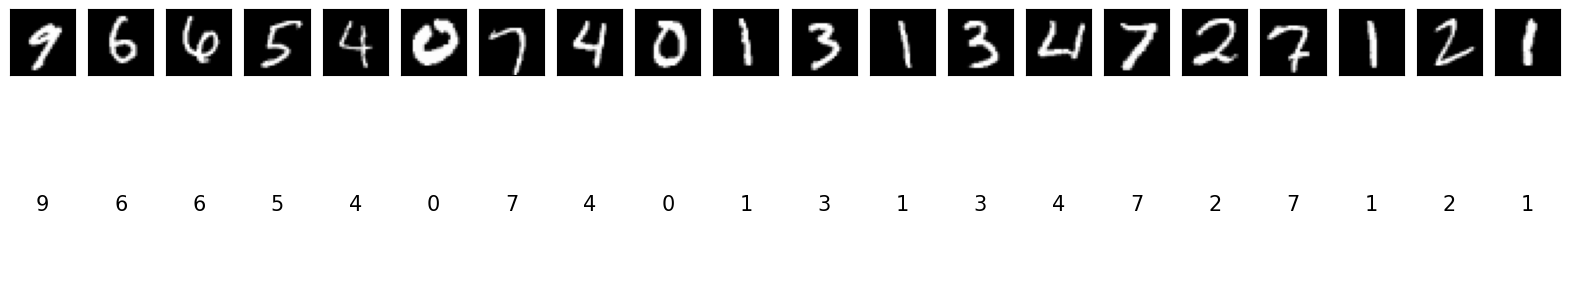

In [19]:
n=len(x_valid)
plt.figure(figsize=(20, 4))
for i in range(n):
    ax= plt.subplot(2, n, i+1)
    plt.imshow(x_valid[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    pred_dig = np.argmax(y_pred_probs_valid[i])
    ax=plt.subplot(2, n, i+n+1)
    plt.text(0.5, 0.5, str(pred_dig), size=15, ha='center')
    plt.axis('off')

plt.show()
plt.close()

**WHy CNN?**

1. More accurate predictions
2. Much lesser number of parameters
3. Higher accuracy score